## Hello (noteboek geinspireert door Kaggle aangepast door Ferry !!)
Dit notebook en een vliegende start in data-analyse en machinelearning. Plaats dit bestand samen met de CSV file in de map Bootcamp/Dag3.
dan:

$ git add Pima_v23.ipynb diabetes.csv

$ git commit -m "EIGEN BERICHT"

$ git push


## Een AI/Datascience project doorloop altijd de volgende stappen:

1)Feature Selection

2)Model selection

3)Input validation

4)Voorspellen

5)Validatie door confusion

6)Selectie model

5)Gradio webinterface naar diagnostic tool op basis van gekozen model


## Vraag 1

Om een systeem te kunnen bouwen en testen is enige domeinkennis absoluut noodzakelijk, bekijk de volgende vragen en beantwoord ze in de volgende cel.

Beantwoorden in de volgende cel:
- Wat is diabetes?
- Hoe krijg je het?
- Zijn er verschillende soorten?
- Wat zijn de gevolgen?
- Hoe wordt het gediagnostiseerd?
- Hoe wordt het behandeld?

## Tot slot;
ChatGPT/Google/Bing kunnen op alle vragen een antwoordt geven, het gaat niet om het antwoordt het doel is
begrip te krijgen in het domein. Zoek het op vat samen en maak begrippen voor je zelf duidelijk.

#### Cell 2 Ken je domein zodat je de data kan evalueren: max 20 min

*Wat is diabetes?* 
Diabetes, ook bekend als diabetes mellitus, is een chronische ziekte waarbij het lichaam niet in staat is om suiker, of glucose, correct te verwerken. Dit komt doordat het lichaam ofwel geen insuline aanmaakt (type 1 diabetes), ofwel niet goed reageert op insuline (type 2 diabetes). Insuline is een hormoon dat nodig is om glucose vanuit het bloed in de cellen te krijgen, waar het wordt gebruikt voor energie.

##### *Hoe krijg je het?*
Diabetes kan worden veroorzaakt door verschillende factoren. Type 1 diabetes wordt vaak veroorzaakt door een auto-immuunreactie waarbij het lichaam zijn eigen insulineproducerende cellen aanvalt. De exacte oorzaak hiervan is onbekend. Type 2 diabetes wordt vaak geassocieerd met overgewicht, gebrek aan lichaamsbeweging, hoge bloeddruk en erfelijkheid.

##### *Zijn er verschillende soorten?*
Ja, er zijn voornamelijk twee soorten diabetes: type 1 en type 2. Er is ook zwangerschapsdiabetes, dat kan optreden tijdens de zwangerschap, en prediabetes, waarbij de bloedsuikerspiegel hoger is dan normaal maar nog niet hoog genoeg om als diabetes te worden geclassificeerd.

##### *Wat zijn de gevolgen?*
Onbehandelde of slecht beheerde diabetes kan leiden tot ernstige gezondheidsproblemen, waaronder hartziekten, nierziekten, blindheid, zenuwschade en amputaties.

##### *Hoe wordt het gediagnostiseerd?*
Diabetes wordt meestal gediagnosticeerd door middel van bloedonderzoek. Dit kan een nuchtere bloedsuikertest zijn, een orale glucose tolerantietest, of een geglycosyleerd hemoglobine (A1C) test.

##### *Hoe wordt het behandeld?*
Behandeling voor diabetes kan bestaan uit een combinatie van dieet, lichaamsbeweging, gewichtsverlies, medicatie en insuline therapie. Het doel van de behandeling is om de bloedsuikerspiegel te normaliseren en complicaties te voorkomen of te beheren. Het is ook belangrijk voor mensen met diabetes om regelmatig medische controles te ondergaan om hun aandoening te monitoren.


## Terug naar de les deel 2.

####  Import voor benodigde modules. Heb je een foutmelding installeer dan met Pip de ontbrekende modules.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')


### Opdracht 1: 
Gebruik pandas (pd) om het bestand diabetes.csv in te lezen en toe te kennen aan variable genaamd diab. 

In [2]:
# diabetes data inladen
diab = pd.read_csv("diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Opdracht 2:

Check de data zijn alle records in de tabel juist.
Maak drie tests in python om te zien of de data correct is. 

TIP: het pandas object heeft hiervoor ook een aantal ingebouwde functies. (desscribe())

In [3]:
# Hoeveel records zijn er?
total_records = len(diab)
print("Er zijn:", total_records, "Records")

# Is dat genoeg voor een AI oplossing?

Er zijn: 768 Records


Met ongeveer 700 records is het mogelijk om een voorspelling te maken over een persoon of die diabetes heeft. Maar een grotere dataset zou beter geweest zijn. Ook ontbreekt er veel data is de dataset, en dat betekend dat het model nog minder data heeft om mee te trainen. Dit kan dus ook de accuratie omlaag brengen.

In [4]:
# test 1 (b.v nul waarden)

# Tel alle nul waarden
print((diab == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Dit print de hoeveelheid nullen per kollom. Dit is handig om te weten zodat je weet hoeveel data je mist.

In [5]:
# test 2 (b.v nan waarden)
print(diab.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# test 3 (Wat kan je nog meer testen)
print(diab.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# vervang 0 and NaN waarden.

# Vul alle waarden (Glucose, BloodPressure, SkinThickness,Insulin, BMI) met mean()
diab['Glucose'].replace(0, diab['Glucose'].mean(), inplace=True)
diab['BloodPressure'].replace(0, diab['BloodPressure'].mean(), inplace=True)
diab['SkinThickness'].replace(0, diab['SkinThickness'].mean(), inplace=True)
diab['Insulin'].replace(0, diab['Insulin'].mean(), inplace=True)
diab['BMI'].replace(0, diab['BMI'].mean(), inplace=True)



Hier vervangen we alle 0 data naar het gemiddelde. Dit is cruciaal als je een model op data wilt gebruiken. 

### Opdracht 3:

Hoeveel gevallen van diabetes zijn er?
Is het volgens jouw een probleem dat er een verschil is tussen het aantal diabetes gevallen en geen diabetes?

Reken de waarden hieronder uit.

In [8]:
# Berekenen van totale hoeveelheid diabetes
count_diabetes = diab['Outcome'].sum()
print("Totale hoeveelheid diabetes:", count_diabetes)
print("Percentage:", (count_diabetes / len(diab)) * 100, "%")

Totale hoeveelheid diabetes: 268
Percentage: 34.89583333333333 %


Hier is een overzicht van het percentage mensen met diabetes. 

## Terug naar de les derde deel.

### Een korte analyse.

Run de onderstaande cell en bestudeer de plots, valt er iets op speel ook eens met het aantal bins in het histogram? 

/var/folders/rb/s64t2st546nf5s34m4gs9n480000gn/T/ipykernel_67012/1154753816.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(int(length/2),3,j+1)


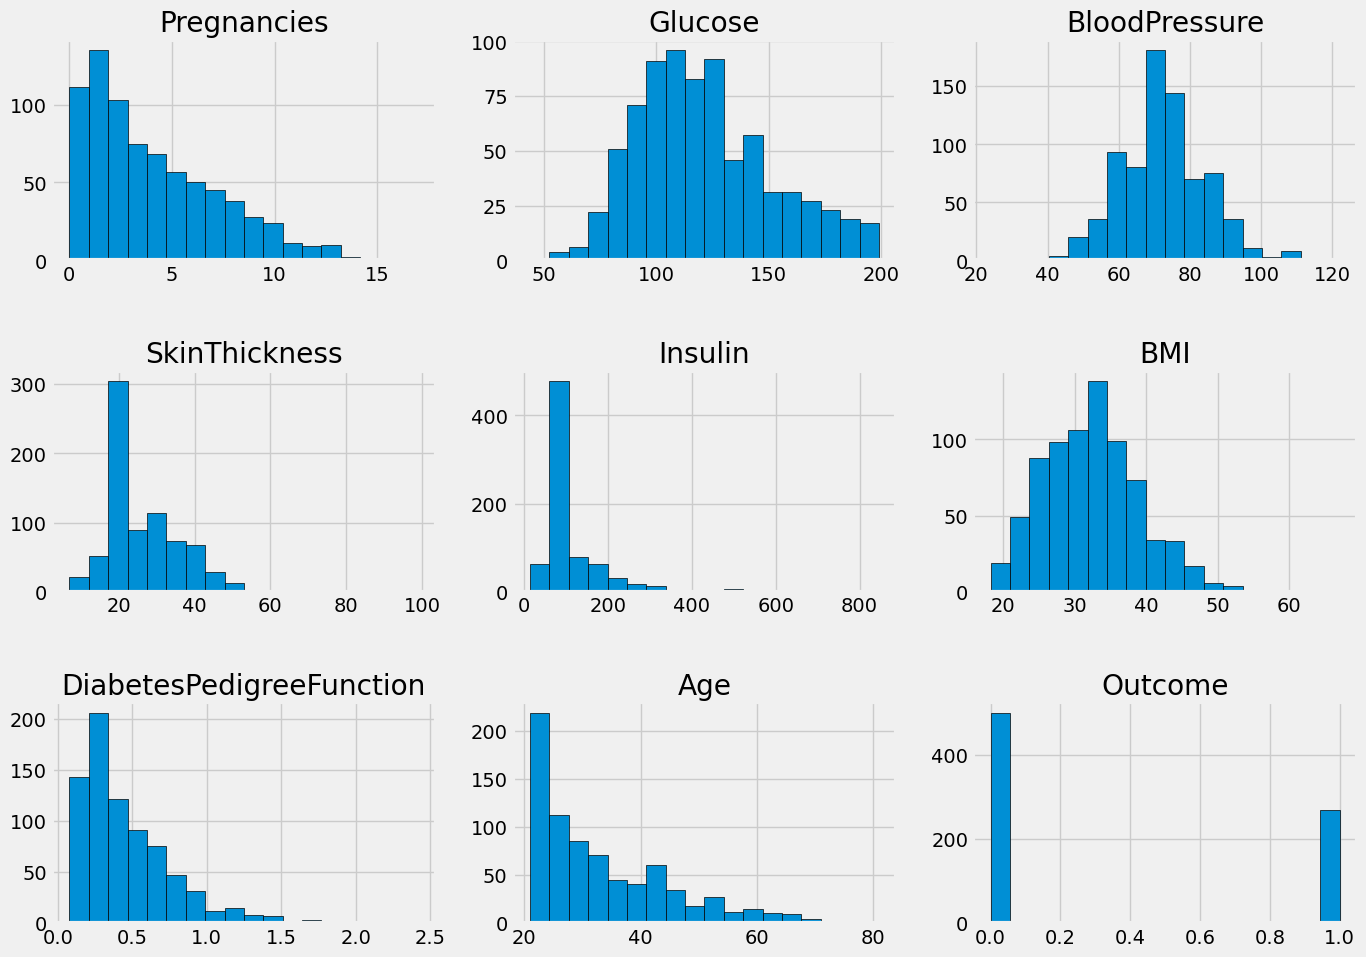

In [9]:
columns=diab.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=18,edgecolor='black')
    plt.title(i)
plt.show()

### Opdracht 4:
Wat valt er op?

De waarden zijn niet normaal verdeeld. Misschien `BloodPressure` maar dat is ook een stretch.

Heeft het aantal bins invloed op de vorm van de histogrammen en zoja waarom?

Met `bins=20` is er bij `Pregnancies` een lege ruimte. Het lijkt net alsof er *geen* data is voor dat punt. Dat is echter niet het geval. Met `bins=18` is de witruimte weg. hierdoor kunnen de ruimtes die eerder leeg waren nu worden opgeuld door bredere bins. Het enige wat veranderd, is de visualisatie van de data, niet de data zelf.

### Opdracht  5:

Doe de zelfde test maar selecteer nu alleen op de gevallen met diabetes. Is er een verschill met de plots waarin alle gevallen staan. Geef een motivatie? 
Het enige verschil wat ik echt kan zien, is dat het `Glucose` niveau omhoog is gegaan vergeleken met de eerdere plots. Dit betekend dus dat mensen die diabetes hebben, waarschijnlijk ook een hogere glucose waarden hebben.

**Bevatten sommige kolommen ongeldige waarden?**
Nee, als het goed is zijn alle 0 waardes gevuld, en zijn er geen NaN's of null's.

**Repareer de tabel zo dat er geen nul waarden instaan?**
Gedaan

**Welke waarde zou je kiezen als vervanging van de nul waarden?**
Glucose, BloodPressure, SkinThickness,Insulin, BMI zijn alle features die gevuld moesten worden. Al deze features zijn Ratio's, er is een absoluut 0 punt bij deze features. Daarom heb ik gekozen om het te vullen met de `mean()`

TIP: Maak eerst een tabel met alleen de diabetes gevallen en gebruik de onderstaande cellen. 

/var/folders/rb/s64t2st546nf5s34m4gs9n480000gn/T/ipykernel_67012/3377943473.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(int(length/2),3,j+1)


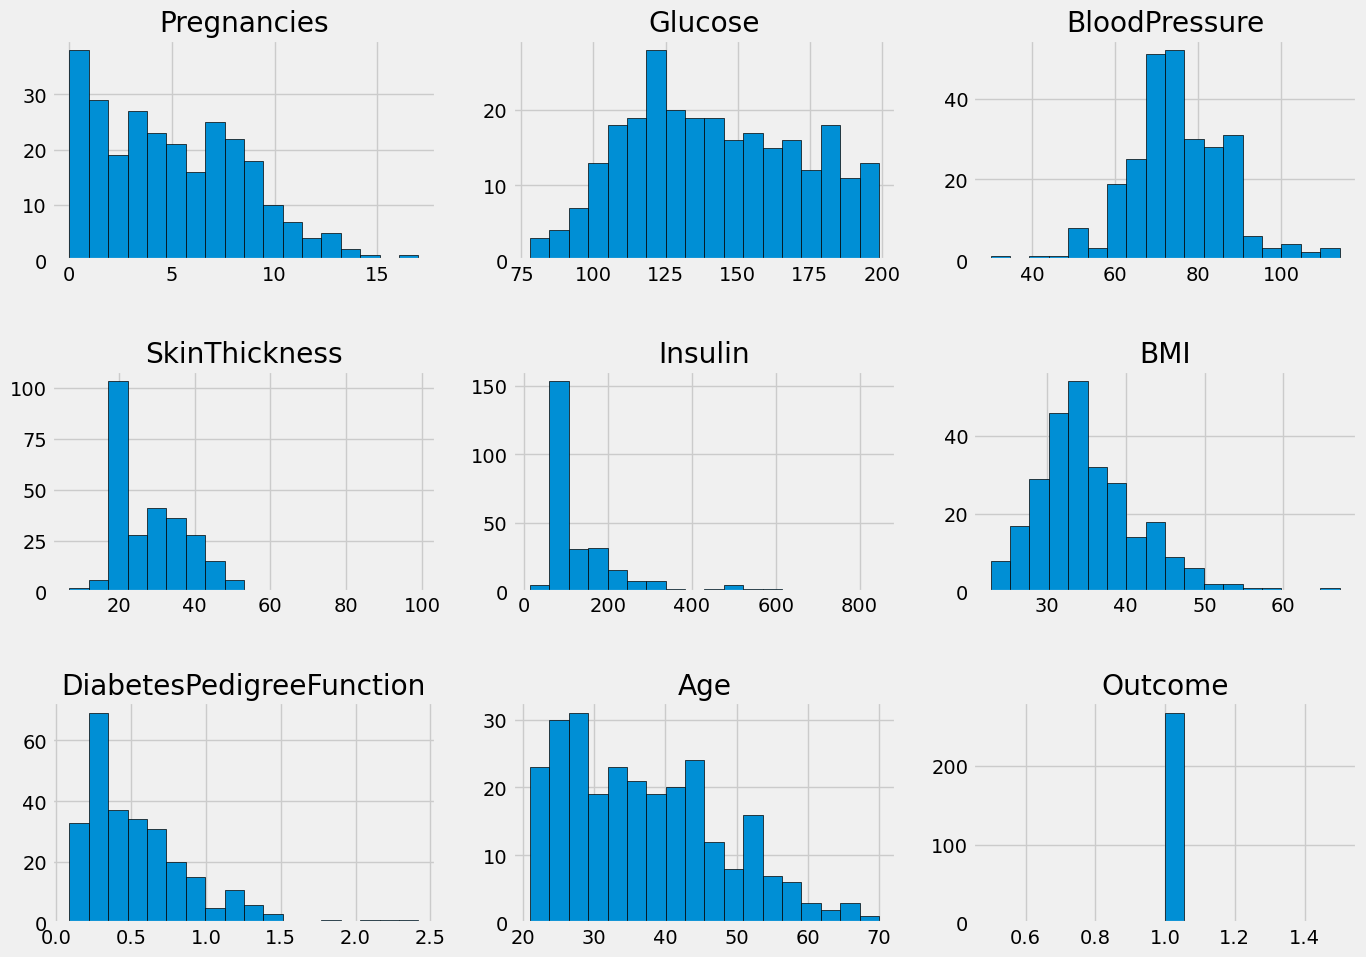

In [10]:
# DataFrame met diabetes
diab_diabetes = diab[diab['Outcome'] == 1]

columns=diab_diabetes.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab_diabetes[i].hist(bins=18,edgecolor='black')
    plt.title(i)
plt.show()

/Users/jonathanricardo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


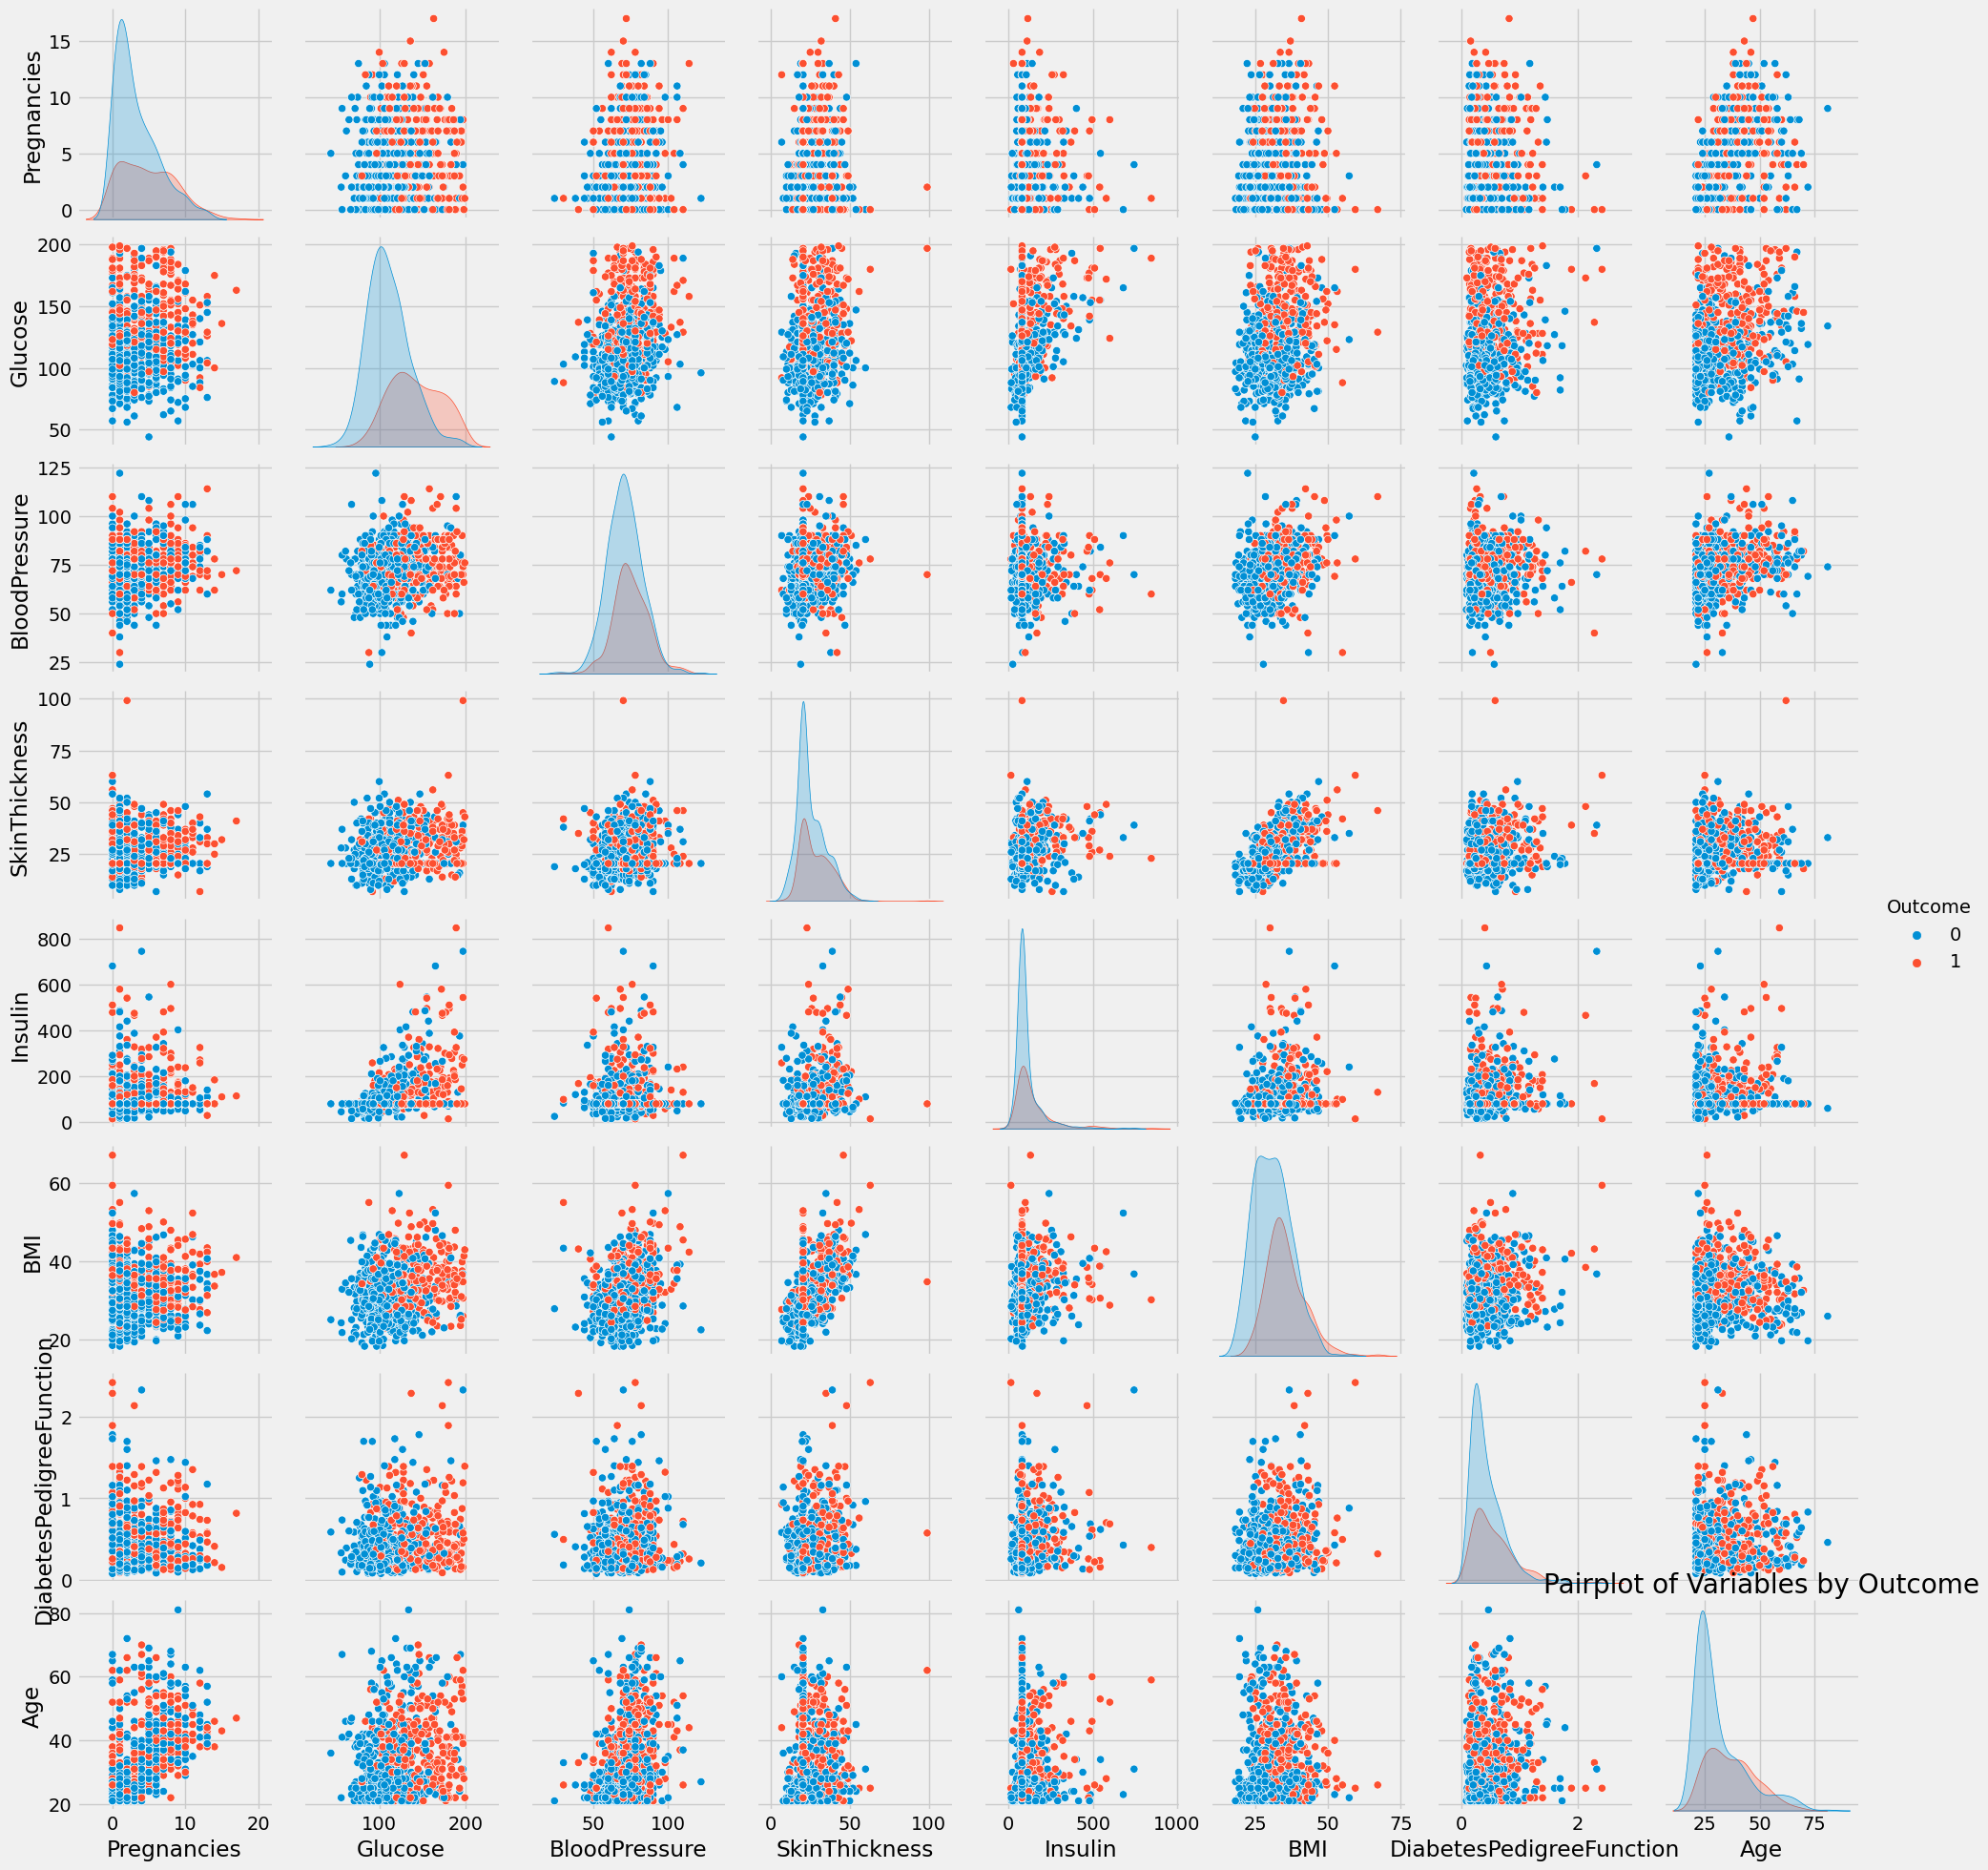

In [11]:
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = [20, 20]

sns.pairplot(diab, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")

plt.show()

De functie sns.pairplot() genereert een matrix van scatterplots. Voor elk paar van de gespecificeerde variabelen ("Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age") maakt het een scatterplot. Hierdoor kun je de relaties tussen verschillende paren variabelen zien.

De parameter `hue="Outcome"` betekent dat datapunten in de scatterplots worden gekleurd op basis van de "Outcome" kolom van de DataFrame. Dit kan je helpen om te zien hoe de verdeling van elk paar variabelen verschilt op basis van de uitkomst.

Op de diagonaal van de matrix, waar een variabele tegen zichzelf zou worden uitgezet, toont `pairplot` een histogram van de waarden van die variabele.



### Opdracht  6 

Hoe bepaal je in pandas de correlatie tussen twee of meerdere kolomen?

Met `diab.corr()` kan je de correlatie berekenen van alle kolommen, maar je kan het ook per kolom doen bijvoorbeeld: `diab[Glucose].corr(diab['BMI])`

Wat betekent het als er sprake is van een correlatie?

Correlatie beschrijft de lineaire relatie tussen twee variabelen. Een positieve correlatie betekent dat als de ene variabele toeneemt, de andere variabele over het algemeen ook toeneemt. Een negatieve correlatie betekent dat als de ene variabele toeneemt, de andere variabele over het algemeen afneemt.

De sterkte van de correlatie wordt aangegeven door het absolute waarde van de correlatiecoëfficiënt. Een waarde van 0 betekent dat er geen lineaire relatie is tussen de variabelen. Een waarde van 1 of -1 betekent dat er een perfecte positieve of negatieve lineaire relatie is. Waarden dichtbij 0 geven een zwakke correlatie aan, terwijl waarden dichtbij -1 of 1 een sterke correlatie aangeven.





In [12]:
# Correlaties berekenen
correlaties = diab.corr()
print(correlaties)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.018082  0.396597       0.010926       0.240361   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018082  0.021546                 -0.033523   
Glucose                   0.396597  0.231

### Opdracht 7:

Hoe maak je in SNS een heatmap, wat is een heatmap eigenlijk?

Een heatmap is een grafische representatie van gegevens waarbij de individuele waarden in een matrix worden weergegeven als kleuren. Het is een manier om visueel complexe gegevenssets te verkennen en patronen, variaties, consistenties en anomalieën te begrijpen.

Dit doe je met behulp van `heatmap()`

Maak een correlatie tabel in pandas en geef die weer in een heatmap

### Deelvraag: Maak in seaborn een heatmap gevuld een pandas correlatie tabel.?
Hier maak ik een heatmap met `heatmap()` op de `correlaties` DataFrame. Ook geef ik de parameter `annot=True` mee zodat je de correlatie waarden kan zien in de map. `cmap='coolwarm'` zorgt voor een ander kleurschema.


<Axes: >

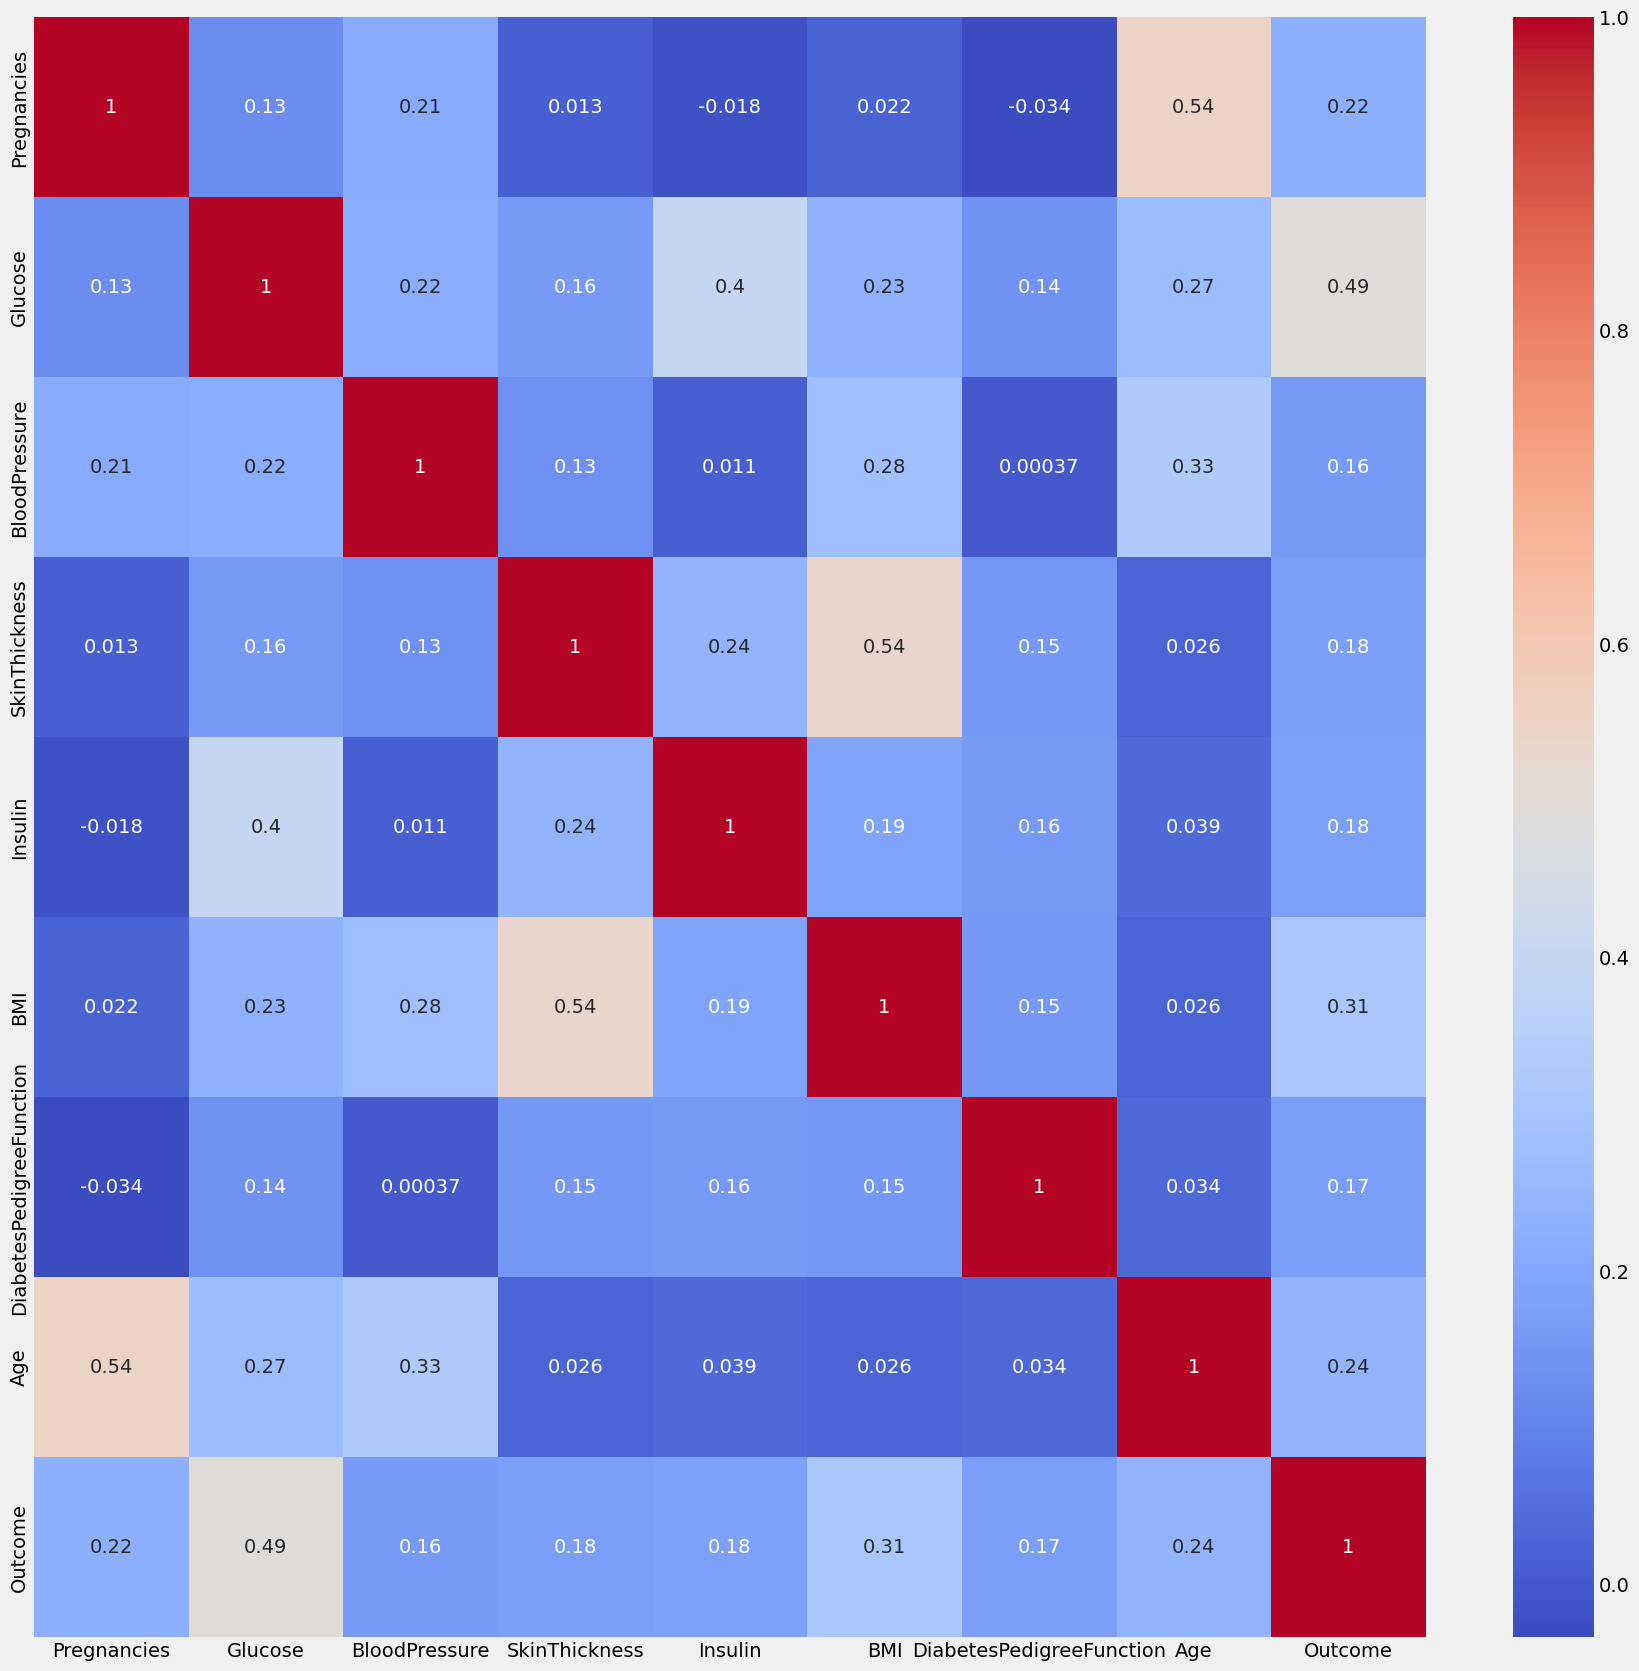

In [13]:
# Heatmap
sns.heatmap(correlaties, annot=True, cmap='coolwarm')

## Terug naar de les deel 4.

### Laten we eens wat voorspellen!

Gevraagd bekijk van eenieder hier ondergenoemde classifiers (zie de python imports) de wikipedia pagina. 
Welke denk je dat voor ons probleem het meeste geschikt is en waarom?


Wat zijn de verschillen tussen de clasifier?

Support Vector Machine (SVM): SVM is een classifier die werkt door een hyperplane te vinden die de klassen in de gegevens zo goed mogelijk scheidt. Het is effectief in hoge dimensionale ruimtes, wat het nuttig maakt voor gegevens met veel kenmerken.

K-Nearest Neighbors (KNN): KNN werkt door voor elk testpunt de 'K' dichtstbijzijnde trainingsexemplaren te vinden en de meest voorkomende klasse onder deze buren te kiezen. Het is een eenvoudige methode die goed werkt voor kleine datasets, maar kan traag zijn voor grote datasets.

Decision Tree: Decision Trees splitsen de gegevens op basis van verschillende kenmerken om verschillende 'takken' te vormen, en maken voorspellingen op basis van deze splitsingen. Ze zijn eenvoudig te begrijpen en te visualiseren, maar kunnen vatbaar zijn voor overfitting.

Logistic Regression: Logistic Regression is een statistische methode die een logistische functie gebruikt om de waarschijnlijkheid van een bepaalde klasse te modelleren. Het wordt vaak gebruikt voor binaire classificatieproblemen.

Om welke reden zou je een bepaalde clasifier kiezen?

Ik heb voor logistic regression gekozen, omdat dit een goeie basislijn is voor binaire classificatie problemen, zoals dus wel diabetes of niet diabetes. Het is eenvoudig en snel te trainen, en het geeft je ook de mogelijkheid om de impact van individuele kenmerken op de uitkomst te interpreteren.

Zijn er nog meer clasisfiers zoja welke?

Er zijn zeker nog andere classifiers beschikbaar. Enkele voorbeelden zijn Random Forests, Gradient Boosting Machines, Naive Bayes classifiers, en Neural Networks. Elk van deze heeft zijn eigen sterke en zwakke punten, en kan nuttig zijn voor verschillende soorten problemen.

In [14]:
# Importeen aantal standaard systeem voor machine-learning gebruik pip om de ontbrekende modules te installeren.

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Opdracht 8:

Zoek uit wat er in het onderstaande blok gebeurt, geef hieronder de beschrijving in je eigen woorden (geen GPT output):

Eerst wordt er een variable `outcome` gemaakt en daarin wordt de data van Outcome ingezet, hierin staat wie wel en niet diabetes heeft.

Daarna slaan we de eerste 8 kolommen op in `data`. Deze data variable wordt helemaal niet gebruikt, dus die kan weg.

Met de `train_test_split` word de data opgesplitst in 2, `train` en `test`. met `test_size=0.25` word de split aangegeven, 25% test data en 75% train data. `random_state=0` is een seed voor het testen, dit betekend dat er elke keer dat dit model getraint word, er elke keer het zelfde uitkomt. De `stratisfy` param zorgt ervoor dat er in de test en train data, de zelfde verhouding aan `Outcome` is ten opzichten van de originele data. Dat betekend dat als er in de orignele dataset 30% diabtische mensen waren, dat dat ook zo gaat zijn in de test en train data.

Daarna splitsen we de test en train data op in `X` en `y` respectief. In `y` stoppen we de outcome waarmee we de nauwkeurigheid kunnen meten.

In [15]:
# De code hieronder is absuluut noodzakelijk voor een ML training.
# Er staat wel een regel teveel!, wat kan weg?

outcome=diab['Outcome']
data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [16]:
train_X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80.0,74.000000,11.000000,60.000000,30.000000,0.527,22
453,2,119.0,69.105469,20.536458,79.799479,19.600000,0.832,72
706,10,115.0,69.105469,20.536458,79.799479,31.992578,0.261,30
606,1,181.0,78.000000,42.000000,293.000000,40.000000,1.258,22
118,4,97.0,60.000000,23.000000,79.799479,28.200000,0.443,22


In [17]:
train_Y.head(5)

432    0
453    0
706    1
606    1
118    0
Name: Outcome, dtype: int64

### Opdracht 9:

Wat zie je in de output van de bovenstaande cellen? (2 stuks)

Antwoord:
    
`train_X` is de feature matrix. Dit bevat alle data die het model gebruikt om te leren. 

`train_Y` is de target vector. Dit bevat de daadwerkelijke waarden die je probeert te voorspellen. Hiermee wordt uiteindelijk mee vergelijkt met hoe nauwkeurig je model is.


### SVM (Zoek uit wat een SVM model is?) 

SVM staat voor Support Vector Machine. Het is een soort machine learning model dat vooral wordt gebruikt voor classificatie- en regressieproblemen. Het idee achter SVM is vrij eenvoudig: het model creëert een lijn (of een hyperplane in hogere dimensies) die de klassen zo goed mogelijk scheidt.

SVM probeert de beslissingsgrens te vinden die de grootste marge heeft tussen de dichtstbijzijnde punten van elke klasse. Deze punten worden support vectors genoemd. De marge is de afstand tussen de scheidingslijn en de dichtstbijzijnde punten van elke klasse. Door het maximaliseren van deze marge, probeert SVM een model te bouwen dat zo robuust mogelijk is.

Lineaire SVM: Zoals de naam al doet vermoeden, gebruikt een lineaire SVM een lineaire functie om een beslissingsgrens te trekken die de verschillende klassen in de gegevens scheidt. Dit betekent dat het ervan uitgaat dat de gegevens lineair scheidbaar zijn, dat wil zeggen, er kan een rechte lijn (of in hogere dimensies, een hyperplane) worden getrokken die de klassen scheidt. Als de gegevens niet lineair scheidbaar zijn, zal een lineaire SVM waarschijnlijk niet goed presteren.

RBF SVM: Een RBF SVM, aan de andere kant, kan omgaan met niet-lineaire gegevens. De RBF kernel, die vaak wordt gebruikt met SVM, is in staat om niet-lineaire beslissingsgrenzen te creëren. Dit wordt gedaan door de gegevens naar een hogere dimensie te transformeren waarin ze lineair scheidbaar zijn, en dan een hyperplane in die hogere dimensie te trekken. Deze hyperplane wordt dan getransformeerd terug naar de originele dimensie, wat resulteert in een niet-lineaire beslissingsgrens.

In [18]:
from sklearn.metrics import confusion_matrix

types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))
    print('Confusion Matrix=', i, confusion_matrix(test_Y, prediction))

Accuracy for SVM kernel= rbf is 0.7552083333333334
Confusion Matrix= rbf [[113  12]
 [ 35  32]]
Accuracy for SVM kernel= linear is 0.7604166666666666
Confusion Matrix= linear [[109  16]
 [ 30  37]]


### Logistic Regression (Wat is een Logistic Regression model?)

Logistische regressie is een statistisch model dat in de machine learning wordt gebruikt voor binaire classificatieproblemen - problemen met twee mogelijke uitkomsten.

In tegenstelling tot lineaire regressie, die een continue uitkomst voorspelt, voorspelt logistische regressie de waarschijnlijkheid van een bepaalde uitkomst. Het modelleert de kans dat een bepaalde invoer tot een bepaalde klasse behoort. Bijvoorbeeld, de kans dat een e-mail spam is, gezien de woorden in de e-mail.

Logistische regressie doet dit door gebruik te maken van de logistische functie, ook wel de sigmoid functie genoemd. Deze functie kan elke reële waarde nemen en deze omzetten in een waarde tussen 0 en 1, wat handig is voor het modelleren van waarschijnlijkheden.

De uitvoer van het logistische regressiemodel is dan een waarde tussen 0 en 1. Om dit te gebruiken voor classificatie, kies je meestal een drempelwaarde. Als de uitvoerwaarde groter is dan de drempel, voorspel je klasse 1, anders voorspel je klasse 0.

Een van de voordelen van logistische regressie is dat het niet alleen een voorspelling geeft, maar ook de kans op die voorspelling, wat nuttige informatie kan zijn. Het is ook een relatief eenvoudig en efficiënt algoritme, dat goed werkt als je een lineaire beslissingsgrens hebt.

In [19]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))
print('Accuracy for LR is', confusion_matrix(test_Y, prediction))

The accuracy of the Logistic Regression is 0.7708333333333334
Accuracy for LR is [[108  17]
 [ 27  40]]


# Vraag: Welk model van de drie geeft het beste resultaat?

Logistic Regression heeft een accuratie van 78.125%, dat is ±1% meer dan SVM rbg & linear.

# Vraag: Als je van de drie modelen de confusion matrices naast elkaar zet welke kies je dan als beste? 

SVM rbf : `[[113  12][ 35  32]]`
SVM linear : `[[109  16][ 30  37]]`
LR : `[[108  17][ 27  40]]`

Hieruit de volgende accuraties:
SVM rbf : 0.75520 %
SVM linear : 0.76041 %
LR : 0.77083 %

Logistic regression heeft hier de beste accuratie.


### Opdracht  10:
Maak voor de decision tree classifier een getraind model en test de nauwkeurigheid.



In [20]:
model=DecisionTreeClassifier()

model.fit(train_X, train_Y)

prediction = model.predict(test_X)

print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))


The accuracy of the Decision Tree is 0.7083333333333334


### Alle systemen op een rijtje.


In [21]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.760417
Radial Svm,0.755208
Logistic Regression,0.770833
KNN,0.744792
Decision Tree,0.718750


De bovenstaande algoritmen geven geen erg hoge nauwkeurigheid. Dit kan worden verbeterd door attributeselectie te gebruiken en alleen relevante kolommen te gebruiken. We kunnen ook gebruik maken van ensembling of middeling van verschillende algoritmen. 

## Vraag: Wat is ensembling?

Ensembling is een machine learning techniek waarbij meerdere modellen (ook wel "base learners" of "weak learners" genoemd) worden getraind en hun voorspellingen worden gecombineerd om een uiteindelijke voorspelling te maken. Het idee is dat door het combineren van meerdere modellen, de uiteindelijke voorspelling nauwkeuriger en/of robuuster zal zijn dan de voorspelling van een enkel model.


### Opdracht 11 

Om de nauwkeurigheid van een model te bepalen wordt ook wel gebruik 
gemaakt van een confusion matrix, maak voor elk van de modellen een confusion 
matrix en doe een uitspraak over de betrouwbaarheid van ieder model?

- Linear SVM (0.760417): Dit model heeft een redelijk hoge nauwkeurigheid, wat aangeeft dat het in staat is om een groot deel van de gegevens correct te classificeren. SVM's zijn krachtige modellen die goed kunnen presteren op een breed scala aan datasets, maar ze kunnen gevoelig zijn voor overfitting als de parameters niet goed worden ingesteld.

- Radial SVM (0.755208): De nauwkeurigheid van dit model is iets lager dan die van de Linear SVM, maar het verschil is vrij klein. Radial SVM's kunnen complexere beslissingsgrenzen vormen dan Linear SVM's, wat ze potentieel krachtiger maakt, maar ook meer vatbaar voor overfitting.

- Logistic Regression (0.770833): Dit model heeft de hoogste nauwkeurigheid van allemaal, wat suggereert dat het het meest betrouwbaar zou kunnen zijn voor deze specifieke dataset. Logistic Regression is een eenvoudig en robuust model dat goed kan presteren op datasets die lineair scheidbaar zijn.

- KNN (0.744792): De nauwkeurigheid van dit model is iets lager dan die van de SVM's en de Logistic Regression. KNN is een eenvoudig model dat goed kan presteren op datasets met weinig ruis, maar het kan slecht presteren als er veel irrelevante kenmerken zijn.

- Decision Tree (0.703125): Dit model heeft de laagste nauwkeurigheid van allemaal, wat suggereert dat het het minst betrouwbaar zou kunnen zijn voor deze specifieke dataset. Decision Trees zijn eenvoudig te begrijpen en kunnen goed presteren op datasets met categorische kenmerken, maar ze hebben de neiging om te overfitten op de trainingsdata.




In [22]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    # creëer een confusion matrix
    conf = confusion_matrix(test_Y, prediction)
    # voeg hem toe aan de dataframe
    abc.append(np.trace(conf) / np.sum(conf))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.760417
Radial Svm,0.755208
Logistic Regression,0.770833
KNN,0.744792
Decision Tree,0.729167


In [23]:
test_Y.describe()

count    192.000000
mean       0.348958
std        0.477887
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

## Feature Extraction/ Selection:

- Veel attributen beïnvloeden de nauwkeurigheid van het algoritme.

- Feature extractie betekent dat je alleen de belangrijkste attributen selecteert om de nauwkeurigheid te verbeteren. 

- Selectie van de belangrijkste attributen verkleint de kans op overfitting en versnelt de training.

- Je kan op twee manieren de belangrijkste attributen selecteren:
 - Via de correlatie matrix en dan de attributen met een lage onderlinge correlatie bewaren/schrappen
 - Via een RandomforestClassifier deze geeft het belang van de attributen aan.



In [24]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.246003
BMI                         0.164072
Age                         0.139772
DiabetesPedigreeFunction    0.121140
BloodPressure               0.090667
Pregnancies                 0.086207
Insulin                     0.082315
SkinThickness               0.069826
dtype: float64

### Gevraagd :Observations:

Wat betekenen de verschillende getallen in de velden. Ga nu terug naar je correlatie matrix en kies de 5 attributen met de laagste onderlinge correlatie en vergelijk deze met de top 5 van de RandomForestClassifier?

1. Pregnancies & DiabetesPedigreeFunction: -0.034
2. Insulin & Pregnacies : -0.018
3. Bloodpressure & DiabetesPedigreeFunction: 0.00037
4. SkinThickness & Pregnancies: 0.013
5. Insulin & Bloodpressure: 0.11

Verschil: DiabetesPedigreeFunction staat 2 keer in de correlatie matrix als lage correlatie. Maar in de feature importances staat hij op de 4e plek qua belangrijkheid. Dus dat komt niet overeen

Overeenkomst: De 4 meest onbelangrijke features volgens de feature importances komen het meeste voor in de laagste correlaties in de matrix.


### Vraag wat zijn volgens jouw de belangrijkste features voor het bepalen van diabetes en geef aan waarop je dat baseert?

Antwoord:
Mensen met diabetes kunnen suikers of glucose niet goed verwerken in hun lichaam. Dus als er een hoog gehalte van glucose in iemand zijn lichaam zit, is de kans hoger dat deze persoon diabetes heeft.

Ook heeft een hoge BMI te maken met overgewicht. Type 2 diabetes is niet chronisch en kan je krijgen door ongezond te eten, waardoor je dus een hoge BMI hebt.


### Tot slot: 
Gezien de resultaten van de voorspellingen zou je een systeem van ML advisreen om disgnose te stellen of iemand diabetes heeft of niet


Antwoord: geef minimaal twee argumenten.
Met mijn modellen is het niet ethisch om een diagnose te tellen of een persoon wel of niet diebetes heeft. Met maar ~75% accuracy zijn zo'n 25% van de mensen diabetisch terwijl ze het niet weten. Wat natuurlijk grote gevolgen kan hebben op iemand zijn gezonheid.  

Ook zou het fijner zijn als er een grotere data set was waarmee we meer kunnen trainen en testen om misschien een hogere accuracy te krijgen. Maar zelfs dan, als de accuracy niet boven de 99% zit, is het het eigenlijk niet waard om te riskeren. Zelfs dan lijdt 1 op de 100 aan diabetes zonder dat die het weet    

## Tot slot maak een webapp met je beste model in gradio?
## Als je het notebook download als Python heb je een complete webapp

In [25]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)


RandomForestClassifier(random_state=0)

In [26]:
import gradio as gr

# make de interface compleet ..

def predict(Leeftijd, Aantal_zwangerschappen, BMI) :
    
    # zet input data om naar een formaat geschikt voor de predict fucntie
    mydata = {
        'Pregnancies' : [Aantal_zwangerschappen] ,
        'Glucose' : [85] ,
        'BloodPressure' : [72] ,
        'SkinThickness' : [35] ,
        'Insulin' : [0] ,
        'BMI' : [BMI] ,
        'DiabetesPedigreeFunction' : [0.726] ,
        'Age' : [Leeftijd] 
    }
    x = pd.DataFrame(mydata)  

    prediction = model.predict(x)
    
    return  'kans  '+ str(prediction)


demo = gr.Interface(fn=predict, 
                    inputs=[gr.Slider(21,80,step = 1), "text", gr.Slider(10,50,)], 
                    outputs=["text"])

demo.launch()
    

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
